# Produção Agrícola Microrregião Geográfica	 - Café

## Área destinada à colheita, área colhida, quantidade produzida, rendimento médio e valor da produção das lavouras permanentes de café

### Fonte: IBGE - Produção Agrícola Microrregião Geográfica	

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option("display.max_rows", None)



In [2]:
df_original = pd.read_excel("./cafe.xlsx")
df = df_original.copy()

### Trabalhando os dados

In [3]:
df.head()

,Microrregião Geográfica,Ano,Variável,Produto das lavouras permanentes,Unnamed: 4
0,Porto Velho (RO),2012.0,Área destinada à colheita (Hectares),Café (em grão) Arábica,-
1,NaN,NaN,NaN,Café (em grão) Canephora,12467
2,NaN,NaN,Área colhida (Hectares),Café (em grão) Arábica,-
3,NaN,NaN,NaN,Café (em grão) Canephora,12249
4,NaN,NaN,Quantidade produzida (Toneladas),Café (em grão) Arábica,-


In [4]:
df.columns = ["microregiao","ano","variavel","tipo_cafe","valores"]
df.columns

Index(['microregiao', 'ano', 'variavel', 'tipo_cafe', 'valores'], dtype='object')

In [5]:
df.shape

(61270, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61270 entries, 0 to 61269
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   microregiao  557 non-null    object 
 1   ano          6127 non-null   float64
 2   variavel     30635 non-null  object 
 3   tipo_cafe    61270 non-null  object 
 4   valores      61270 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.3+ MB


#### Ajustando os campos

In [7]:
df["ano"] = df["ano"].astype("Int64")
df['valores'] = df['valores'].replace('-', 0)
df['valores'] = df['valores'].replace('...', 0)
df["valores"] = df["valores"].astype('Int64')
df["tipo_cafe"] = df["tipo_cafe"].str.strip().str.replace('Café (em grão) ','')
df["tipo_cafe"] = df["tipo_cafe"].str.strip().str.replace('Canephora','Conilon')

In [8]:
df["tipo_cafe"].head(10)

0    Arábica
1    Conilon
2    Arábica
3    Conilon
4    Arábica
5    Conilon
6    Arábica
7    Conilon
8    Arábica
9    Conilon
Name: tipo_cafe, dtype: object

In [9]:
df.head(10)

,microregiao,ano,variavel,tipo_cafe,valores
0,Porto Velho (RO),2012,Área destinada à colheita (Hectares),Arábica,0
1,NaN,<NA>,NaN,Conilon,12467
2,NaN,<NA>,Área colhida (Hectares),Arábica,0
3,NaN,<NA>,NaN,Conilon,12249
4,NaN,<NA>,Quantidade produzida (Toneladas),Arábica,0
5,NaN,<NA>,NaN,Conilon,6604
6,NaN,<NA>,Rendimento médio da produção (Quilogramas por ...,Arábica,0
7,NaN,<NA>,NaN,Conilon,539
8,NaN,<NA>,Valor da produção (Mil Reais),Arábica,0
9,NaN,<NA>,NaN,Conilon,22300


#### Completando os valores nulos

In [10]:
def completar_valores_faltantes(nome_coluna):
    valido = None
    for idx, valor in enumerate(df[nome_coluna]):
        if not pd.isna(valor):
            valido = valor
        else:
            df.at[idx, nome_coluna] = valido


In [11]:
completar_valores_faltantes("microregiao")
completar_valores_faltantes("ano")
completar_valores_faltantes("variavel")

#### Criando novas colunas

In [12]:
df["uf"] = df["microregiao"].str.slice(-5).str.strip().str.replace("(","").str.replace(")","")
df["microregiao"] = df["microregiao"].str.slice(0, -5)
df.head(20)

,microregiao,ano,variavel,tipo_cafe,valores,uf
0,Porto Velho,2012,Área destinada à colheita (Hectares),Arábica,0,RO
1,Porto Velho,2012,Área destinada à colheita (Hectares),Conilon,12467,RO
2,Porto Velho,2012,Área colhida (Hectares),Arábica,0,RO
3,Porto Velho,2012,Área colhida (Hectares),Conilon,12249,RO
4,Porto Velho,2012,Quantidade produzida (Toneladas),Arábica,0,RO
5,Porto Velho,2012,Quantidade produzida (Toneladas),Conilon,6604,RO
6,Porto Velho,2012,Rendimento médio da produção (Quilogramas por ...,Arábica,0,RO
7,Porto Velho,2012,Rendimento médio da produção (Quilogramas por ...,Conilon,539,RO
8,Porto Velho,2012,Valor da produção (Mil Reais),Arábica,0,RO
9,Porto Velho,2012,Valor da produção (Mil Reais),Conilon,22300,RO


In [13]:
# Dicionário mapeando cada UF para sua região
regioes = {
    'AC': 'Norte',
    'AL': 'Nordeste',
    'AP': 'Norte',
    'AM': 'Norte',
    'BA': 'Nordeste',
    'CE': 'Nordeste',
    'DF': 'Centro-Oeste',
    'ES': 'Sudeste',
    'GO': 'Centro-Oeste',
    'MA': 'Nordeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'MG': 'Sudeste',
    'PA': 'Norte',
    'PB': 'Nordeste',
    'PR': 'Sul',
    'PE': 'Nordeste',
    'PI': 'Nordeste',
    'RJ': 'Sudeste',
    'RN': 'Nordeste',
    'RO': 'Norte',
    'RS': 'Sul',
    'RR': 'Norte',
    'SC': 'Sul',
    'SE': 'Nordeste',
    'SP': 'Sudeste',
    'TO': 'Norte'
}

df['regiao_br'] = df['uf'].map(regioes)


In [14]:
df.head()

,microregiao,ano,variavel,tipo_cafe,valores,uf,regiao_br
0,Porto Velho,2012,Área destinada à colheita (Hectares),Arábica,0,RO,Norte
1,Porto Velho,2012,Área destinada à colheita (Hectares),Conilon,12467,RO,Norte
2,Porto Velho,2012,Área colhida (Hectares),Arábica,0,RO,Norte
3,Porto Velho,2012,Área colhida (Hectares),Conilon,12249,RO,Norte
4,Porto Velho,2012,Quantidade produzida (Toneladas),Arábica,0,RO,Norte


### Pivoteando o conjunto de dados

In [15]:
df_pivot = df.pivot_table(index=['microregiao', 'ano', 'tipo_cafe', 'uf', 'regiao_br'],
                                          columns='variavel',
                                          values='valores').reset_index()

df_pivot.columns.name = None
df_pivot = df_pivot[['microregiao', 'ano',
                     'Área destinada à colheita (Hectares)', 
                     'Área colhida (Hectares)', 
                     'Quantidade produzida (Toneladas)', 
                     'Rendimento médio da produção (Quilogramas por Hectare)', 
                     'Valor da produção (Mil Reais)', 
                     'tipo_cafe','uf', 'regiao_br']]

df_pivot.head(10)

,microregiao,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),tipo_cafe,uf,regiao_br
0,Adamantina,2012,9163.0,9163.0,6857.0,748.0,38308.0,Arábica,SP,Sudeste
1,Adamantina,2012,0.0,0.0,0.0,0.0,0.0,Conilon,SP,Sudeste
2,Adamantina,2013,8088.0,8088.0,7637.0,944.0,32489.0,Arábica,SP,Sudeste
3,Adamantina,2013,0.0,0.0,0.0,0.0,0.0,Conilon,SP,Sudeste
4,Adamantina,2014,7660.0,7660.0,6862.0,896.0,38389.0,Arábica,SP,Sudeste
5,Adamantina,2014,0.0,0.0,0.0,0.0,0.0,Conilon,SP,Sudeste
6,Adamantina,2015,6950.0,6950.0,7045.0,1014.0,39585.0,Arábica,SP,Sudeste
7,Adamantina,2015,0.0,0.0,0.0,0.0,0.0,Conilon,SP,Sudeste
8,Adamantina,2016,7083.0,7083.0,7439.0,1050.0,41438.0,Arábica,SP,Sudeste
9,Adamantina,2016,0.0,0.0,0.0,0.0,0.0,Conilon,SP,Sudeste


#### Limpando as linhas zeradas

In [16]:
df_linhas_zeradas = df_pivot.query("`Quantidade produzida (Toneladas)` == 0 and \
                                  `Rendimento médio da produção (Quilogramas por Hectare)` == 0 and \
                                  `Valor da produção (Mil Reais)` == 0")

df_limpo = df_pivot.drop(axis=0,index=df_linhas_zeradas.index).reset_index(drop=True)
df_limpo.head()

,microregiao,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),tipo_cafe,uf,regiao_br
0,Adamantina,2012,9163.0,9163.0,6857.0,748.0,38308.0,Arábica,SP,Sudeste
1,Adamantina,2013,8088.0,8088.0,7637.0,944.0,32489.0,Arábica,SP,Sudeste
2,Adamantina,2014,7660.0,7660.0,6862.0,896.0,38389.0,Arábica,SP,Sudeste
3,Adamantina,2015,6950.0,6950.0,7045.0,1014.0,39585.0,Arábica,SP,Sudeste
4,Adamantina,2016,7083.0,7083.0,7439.0,1050.0,41438.0,Arábica,SP,Sudeste


In [17]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   microregiao                                             3109 non-null   object 
 1   ano                                                     3109 non-null   Int64  
 2   Área destinada à colheita (Hectares)                    3109 non-null   Float64
 3   Área colhida (Hectares)                                 3109 non-null   Float64
 4   Quantidade produzida (Toneladas)                        3109 non-null   Float64
 5   Rendimento médio da produção (Quilogramas por Hectare)  3109 non-null   Float64
 6   Valor da produção (Mil Reais)                           3109 non-null   Float64
 7   tipo_cafe                                               3109 non-null   object 
 8   uf                                    

### Ajustando os dtypes das colunas

In [18]:
df_limpo['ano'] = pd.to_datetime(df_limpo['ano'].astype(str) + '-01-01', format="%Y-%m-%d")
cols_to_convert = [
    'Área destinada à colheita (Hectares)',
    'Área colhida (Hectares)',
    'Quantidade produzida (Toneladas)',
    'Rendimento médio da produção (Quilogramas por Hectare)',
    'Valor da produção (Mil Reais)'
]

for col in cols_to_convert:
    df_limpo[col] = df_limpo[col].astype(int)

df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3109 entries, 0 to 3108
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   microregiao                                             3109 non-null   object        
 1   ano                                                     3109 non-null   datetime64[ns]
 2   Área destinada à colheita (Hectares)                    3109 non-null   int32         
 3   Área colhida (Hectares)                                 3109 non-null   int32         
 4   Quantidade produzida (Toneladas)                        3109 non-null   int32         
 5   Rendimento médio da produção (Quilogramas por Hectare)  3109 non-null   int32         
 6   Valor da produção (Mil Reais)                           3109 non-null   int32         
 7   tipo_cafe                                               3109

### Separando as variáveis

In [19]:

variaveis_quantitativas_continuas = ['Área destinada à colheita (Hectares)',
                                    'Área colhida (Hectares)',
                                    'Quantidade produzida (Toneladas)',
                                    'Rendimento médio da produção (Quilogramas por Hectare)',
                                    'Valor da produção (Mil Reais)']

variaveis_quantitativas_discretas = ['ano']
variaveis_qualitativas_nominais = ['tipo_cafe','uf','regiao_br','microregiao',]

print("Variáveis Quantitativas Contínuas:", variaveis_quantitativas_continuas)
print("Variáveis Quantitativas Discretas:", variaveis_quantitativas_discretas)
print("Variáveis Qualitativas Nominais:", variaveis_qualitativas_nominais)


Variáveis Quantitativas Contínuas: ['Área destinada à colheita (Hectares)', 'Área colhida (Hectares)', 'Quantidade produzida (Toneladas)', 'Rendimento médio da produção (Quilogramas por Hectare)', 'Valor da produção (Mil Reais)']
Variáveis Quantitativas Discretas: ['ano']
Variáveis Qualitativas Nominais: ['tipo_cafe', 'uf', 'regiao_br', 'microregiao']


### Dividindo o conjunto de dados por tipo de café

In [20]:
df_arabica = df_limpo[df_limpo["tipo_cafe"] == "Arábica"]
df_arabica.reset_index(drop=True,inplace=True)
df_arabica.head(10)

,microregiao,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),tipo_cafe,uf,regiao_br
0,Adamantina,2012-01-01,9163,9163,6857,748,38308,Arábica,SP,Sudeste
1,Adamantina,2013-01-01,8088,8088,7637,944,32489,Arábica,SP,Sudeste
2,Adamantina,2014-01-01,7660,7660,6862,896,38389,Arábica,SP,Sudeste
3,Adamantina,2015-01-01,6950,6950,7045,1014,39585,Arábica,SP,Sudeste
4,Adamantina,2016-01-01,7083,7083,7439,1050,41438,Arábica,SP,Sudeste
5,Adamantina,2017-01-01,5728,5728,5305,926,27947,Arábica,SP,Sudeste
6,Adamantina,2018-01-01,5322,5322,5533,1040,29517,Arábica,SP,Sudeste
7,Adamantina,2019-01-01,5142,5142,6400,1245,34378,Arábica,SP,Sudeste
8,Adamantina,2020-01-01,4273,4273,4414,1033,27467,Arábica,SP,Sudeste
9,Adamantina,2021-01-01,4573,4573,5151,1126,46387,Arábica,SP,Sudeste


In [21]:
df_conilon = df_limpo[df_limpo["tipo_cafe"] == "Conilon"]
df_conilon.reset_index(drop=True,inplace=True)
df_conilon.sample(10)

,microregiao,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),tipo_cafe,uf,regiao_br
610,Peçanha,2020-01-01,283,283,437,1544,2328,Conilon,MG,Sudeste
819,Vitória,2021-01-01,1547,1547,4130,2670,33664,Conilon,ES,Sudeste
290,Colíder,2017-01-01,48,48,26,542,116,Conilon,MT,Centro-Oeste
559,Nova Venécia,2015-01-01,67945,67945,113476,1670,534852,Conilon,ES,Sudeste
168,Boca do Acre,2018-01-01,4,4,7,1750,15,Conilon,AM,Norte
687,Santa Teresa,2018-01-01,18694,18694,51518,2756,277666,Conilon,ES,Sudeste
818,Vitória,2020-01-01,1547,1547,3624,2343,20489,Conilon,ES,Sudeste
86,Alto Guaporé,2020-01-01,51,51,45,882,203,Conilon,MT,Centro-Oeste
260,Cataguases,2021-01-01,241,241,574,2382,4746,Conilon,MG,Sudeste
547,Nanuque,2013-01-01,18,18,11,611,41,Conilon,MG,Sudeste


#### Explorando o tipo Arábica

In [22]:
df_arabica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   microregiao                                             2277 non-null   object        
 1   ano                                                     2277 non-null   datetime64[ns]
 2   Área destinada à colheita (Hectares)                    2277 non-null   int32         
 3   Área colhida (Hectares)                                 2277 non-null   int32         
 4   Quantidade produzida (Toneladas)                        2277 non-null   int32         
 5   Rendimento médio da produção (Quilogramas por Hectare)  2277 non-null   int32         
 6   Valor da produção (Mil Reais)                           2277 non-null   int32         
 7   tipo_cafe                                               2277

In [23]:
df_arabica.describe()

,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais)
count,2277,2277.000000,2277.000000,2277.000000,2277.000000,2.277000e+03
mean,2016-12-07 13:45:17.786561280,7307.305665,7296.119895,10918.023276,1359.710145,8.935507e+04
min,2012-01-01 00:00:00,1.000000,1.000000,1.000000,53.000000,3.000000e+00
25%,2014-01-01 00:00:00,57.000000,57.000000,63.000000,965.000000,3.840000e+02
50%,2017-01-01 00:00:00,613.000000,610.000000,829.000000,1270.000000,5.202000e+03
75%,2020-01-01 00:00:00,3815.000000,3796.000000,5473.000000,1667.000000,3.924600e+04
max,2022-01-01 00:00:00,136491.000000,136491.000000,288906.000000,11750.000000,3.480601e+06
std,NaN,17806.805335,17800.889207,28145.506834,696.450419,2.580063e+05


In [24]:
group = df_arabica.groupby(by='uf')['Quantidade produzida (Toneladas)'].sum()
group.sort_values()

uf
PB          68
AM         490
MT        1176
AC        1546
PE        7043
MS        8039
CE        9426
DF       11534
GO      193224
RJ      193878
PR      738760
BA     1085183
ES     2115374
SP     3284823
MG    17209775
Name: Quantidade produzida (Toneladas), dtype: int32

#### Eliminar os estados com pouca representatividade

In [25]:
df_estados_remover = df_arabica.query("uf in ['PB','AM','MT','AC','PE','MS','CE','DF']")
df_arabica.drop(axis=0,index=df_estados_remover.index, inplace=True)
df_arabica.reset_index(drop=True,inplace=True)
df_arabica.head()

,microregiao,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais),tipo_cafe,uf,regiao_br
0,Adamantina,2012-01-01,9163,9163,6857,748,38308,Arábica,SP,Sudeste
1,Adamantina,2013-01-01,8088,8088,7637,944,32489,Arábica,SP,Sudeste
2,Adamantina,2014-01-01,7660,7660,6862,896,38389,Arábica,SP,Sudeste
3,Adamantina,2015-01-01,6950,6950,7045,1014,39585,Arábica,SP,Sudeste
4,Adamantina,2016-01-01,7083,7083,7439,1050,41438,Arábica,SP,Sudeste


In [26]:
df_arabica.describe()

,ano,Área destinada à colheita (Hectares),Área colhida (Hectares),Quantidade produzida (Toneladas),Rendimento médio da produção (Quilogramas por Hectare),Valor da produção (Mil Reais)
count,2002,2002.000000,2002.000000,2002.000000,2002.000000,2.002000e+03
mean,2016-12-18 16:21:49.090909184,8273.004995,8262.279221,12398.110390,1430.755245,1.014970e+05
min,2012-01-01 00:00:00,1.000000,1.000000,1.000000,80.000000,5.000000e+00
25%,2014-01-01 00:00:00,123.250000,122.000000,141.500000,1019.250000,9.352500e+02
50%,2017-01-01 00:00:00,853.000000,850.500000,1192.500000,1317.500000,7.729000e+03
75%,2020-01-01 00:00:00,5357.500000,5357.500000,7835.500000,1710.000000,5.579950e+04
max,2022-01-01 00:00:00,136491.000000,136491.000000,288906.000000,5891.000000,3.480601e+06
std,NaN,18785.022487,18778.497490,29713.253672,635.586340,2.729350e+05


In [41]:
df_cidades = df_arabica[['microregiao', 'uf']].drop_duplicates().reset_index(drop=True)
df_cidades.to_excel("cidades.xlsx", index=False)

<Axes: >

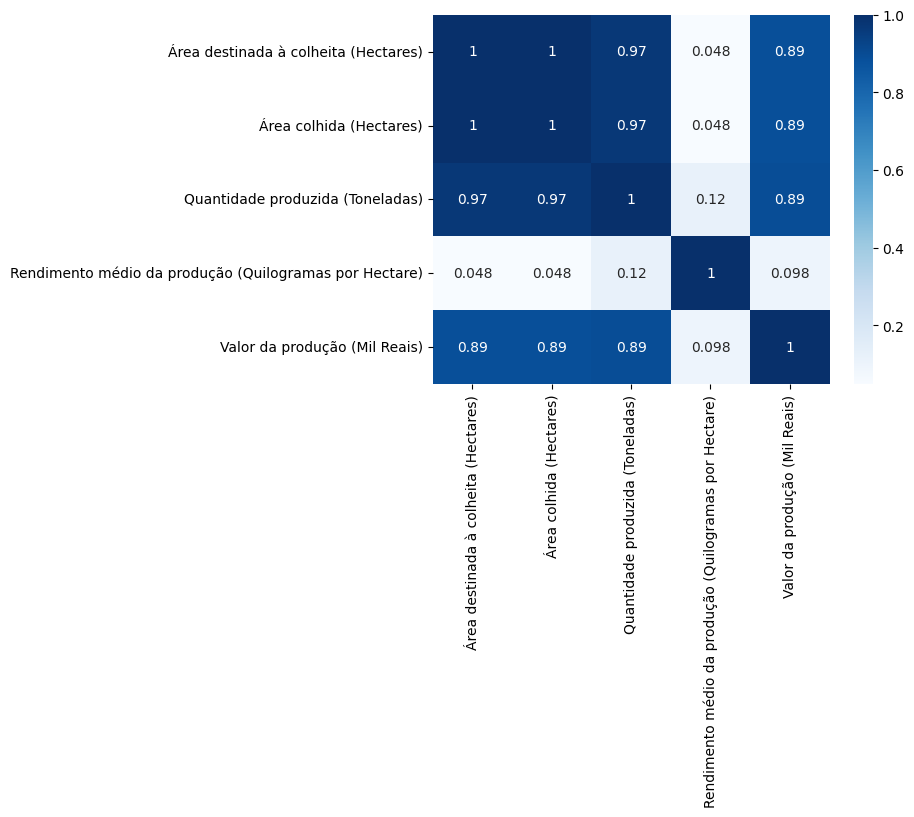

In [28]:
sns.heatmap(df_arabica.corr(numeric_only=True), annot=True, cmap='Blues')

<Axes: xlabel='microregiao'>

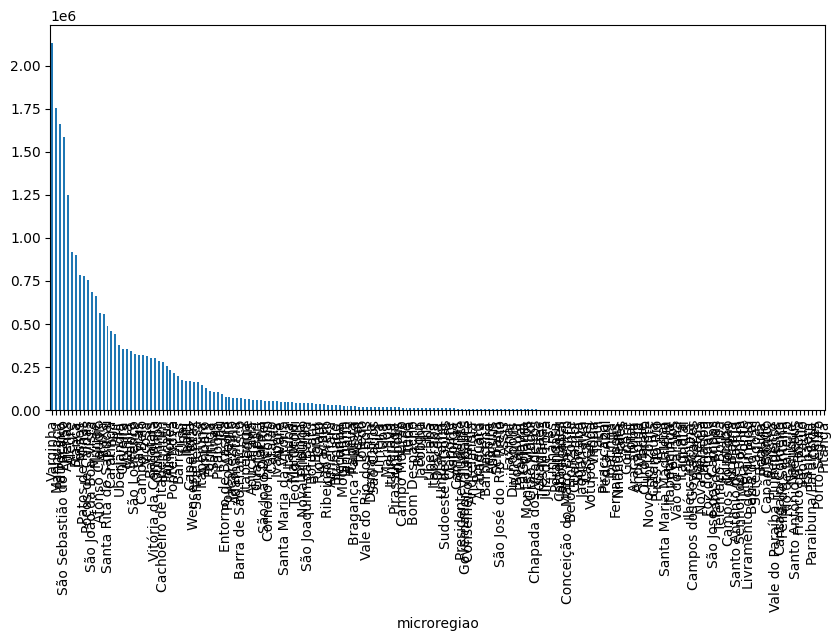

In [29]:
df_arabica.groupby(by='microregiao')['Quantidade produzida (Toneladas)'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))